<a href="https://colab.research.google.com/github/jolurf/Computer-Vision/blob/main/Classical_CV/radiometry_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 : Histogram manipulation and equalisation

In this part of the TP, we are going to look at histogram equalisation. First, let us load the necessary packages and redefine some helper functions. Note that in this part of TP, you can use the plt.imshow function, since we are not interested in the aliasing effects which might occur.

### Your task

In the lab work, you must fill in the code in the places marked FILL IN CODE, or answer the written questions directly on the notebook.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import imageio
from skimage import color

is_colab = False

def read_image(file_name):
    img_color = imageio.imread(file_name)
    # NOTE : color.rgb2gray converts to the range 0 ... 1
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color

def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))

def display_image(img_in):
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

(420, 570)

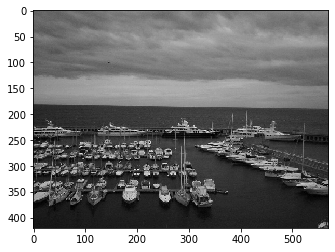

In [ ]:
file_dir = 'images/'
file_name = 'boat'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boat.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

As you can see, this image has pretty bad contrast : it is difficult to see in it. Now, display the histogram of this image to show this (see the intro to images notebook for help)

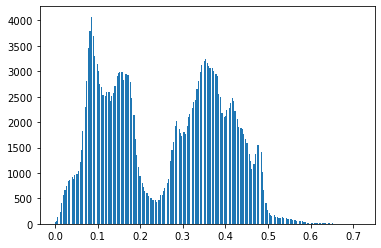

In [ ]:
# FILL IN CODE
_,_,_ = plt.hist(img_gray.flatten(), bins=256)

You will notice that the histogram is not very well spread out over the whole range of the image. We are going to correct this in this part of the TP, by imposing a __uniform histogram__ on the image.

Firstly, calculate the cumulative histogram $H$ of the image and display it (use the np.cumsum function).

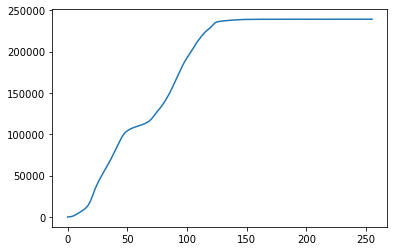

In [ ]:
# FILL IN CODE
hist_vals, bins = np.histogram(img_gray.flatten(), bins=np.linspace(0,1,257))
#print(hist_vals.shape)
# plt.plot(np.cumsum(hist_vals, axis=0))
cumulative = np.cumsum(hist_vals.flatten())
plt.plot(cumulative)

## Histogram equalisation

Now, if we apply the cumulative histogram $H$ as a contrast change, then we are imposing a uniform histogram on the image (see the lesson slides). A contrast change means we do not change the order of the __values__ of the pixels. We are going to use $H$ as a type of lookup table to find the new values of the image.

In practice, this can be done with the following method :

- normalise the cumulative histogram such that the largest value is 1.0. This will map the final image to the interval $0, \dots, 1$ (you will still have a discrete list of values, but floating point ones)
- convert the image grey-levels back to the interval $\{0, \dots 255\}$ as int values. This will allow us to use these values as indices in H
- apply the cumulative histogram to the values of the image pixels

Implement this algorithm now in a function ``equalize_histogram``. __Note__ In the ``np.histogram`` function, the histogram values have one less element than the histogram bins

In [ ]:
def equalize_histogram(img_in):
    hist_vals, bin_edges = np.histogram(img_in.flatten(), bins=np.linspace(0,1,257))
    cumsum = np.cumsum(hist_vals)
    cumsum = cumsum/max(cumsum)
    H = (255*img_in).astype(int)
    img_equalise = cumsum[H]
    return img_equalise

equalize_histogram(img_gray)

array([[0.5175731 , 0.4943609 , 0.5175731 , ..., 0.79564745, 0.76239348,
        0.79564745],
       [0.4943609 , 0.48317043, 0.50104428, ..., 0.77453216, 0.77453216,
        0.79564745],
       [0.48829156, 0.48317043, 0.48829156, ..., 0.77453216, 0.77453216,
        0.79564745],
       ...,
       [0.05011278, 0.05011278, 0.04406433, ..., 0.20408104, 0.38769006,
        0.43119465],
       [0.05011278, 0.05011278, 0.05011278, ..., 0.37548037, 0.32658312,
        0.39934419],
       [0.05777778, 0.05777778, 0.05011278, ..., 0.42557644, 0.38769006,
        0.43119465]])

Carry out the algorithm on the input image and display the image. Is the result better ?
The result is better, as we can check in the cells below. We used the method in order to adjust contrast. When comparing both images, the equalised image has a more uniform distribution. Hence, it's better for visualization. Notice, how the image on the right below is better for visualization.

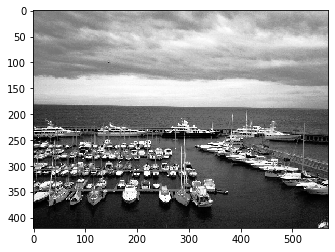

In [ ]:
img_gray_equalise = equalize_histogram(img_gray)
display_image(img_gray_equalise)

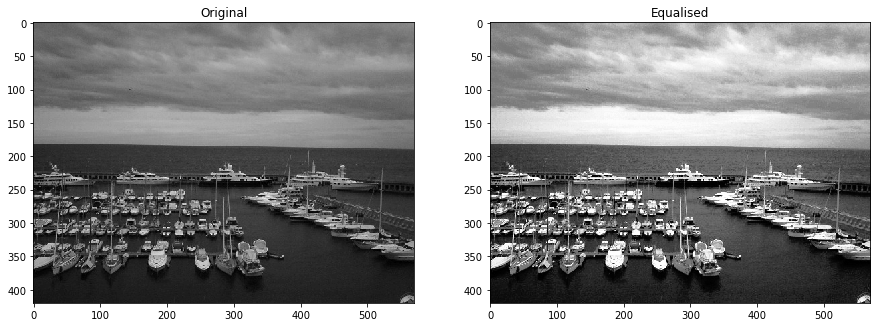

In [ ]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax[0].imshow(img_gray,cmap='gray')
ax[0].title.set_text("Original")
ax[1].imshow(img_gray_equalise, cmap='gray')
ax[1].title.set_text("Equalised")

Now, we display both the histogram and cumulative histogram of the equalised image

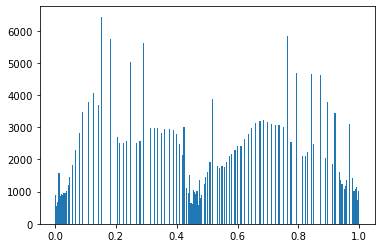

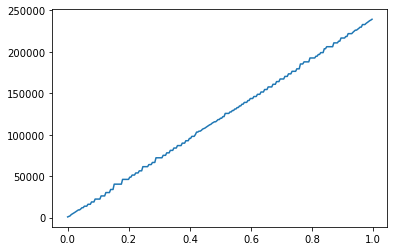

In [ ]:
hist_vals, hist_bins,_ = plt.hist(img_gray_equalise.flatten(), bins=np.linspace(0,1,257))
plt.figure()
plt.plot(hist_bins[:-1],hist_vals.cumsum())

__Questions__ Is the histogram of the equalised image perfectly uniform (flat) ? Why is this the case ?

__Answer__
At first, I doubted of the answer, but as the cumulative graph was close to f(x) = x, it was at elast theoretically correct, despite the histogram being not totally uniform.
Notice that we have a more uniform distribution over the range, even though it is not perfectly uniform. I would say that this is the case because there are many pixels with close values, as we can observe on the right graph (huge spikes). Thus, they fall on the same bin. Also, observe according to this explanation, these spikes would be kept on the equalized graph, which does happen in a more smooth way.

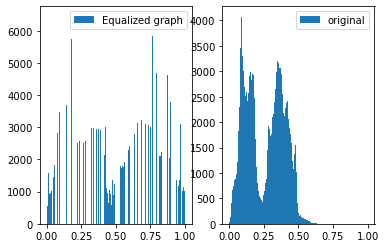

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2)
hist_vals, hist_bins,_ = ax[0].hist(img_gray_equalise.flatten(), bins=np.linspace(0,1,257), label='Equalized graph')
_,_,_ = ax[1].hist(img_gray.flatten(), bins=np.linspace(0,1,257),label='original')
ax[0].legend()
ax[1].legend()

### Colour images

Let us try to apply our algorithm to a colour image. First, let's read the image and display it

(761, 1142, 3)

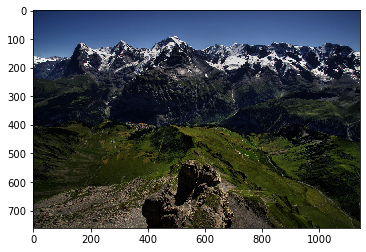

In [ ]:
file_dir = 'images/'
file_name = 'alps_contrast'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png"
  _,img_color = read_image(file_name+file_ext)
else:
  _,img_color = read_image(file_dir+file_name+file_ext)

display_image(img_color)
img_color.shape

Now, create a function ``equalize_histogram_color`` which uses your grey-level function to carry out colour histogram equalisation in each colour channel independently, and display the output image. Careful to

- normalise the input range to $0, \dots, 1$ for each channel when processing it
- put the output range back to $0, \dots, 255$ when displaying.

To view the result better, you can write it to a file.

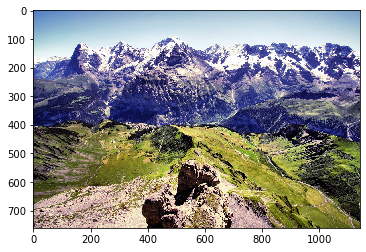

In [ ]:
def equalize_histogram_color(img_color):
    # FILL IN CODE
    img_color_equalized = np.zeros(img_color.shape)
    img_color_equalized[:,:,0] = equalize_histogram(img_color[:,:,0]/255)
    img_color_equalized[:,:,1] = equalize_histogram(img_color[:,:,1]/255)
    img_color_equalized[:,:,2] = equalize_histogram(img_color[:,:,2]/255)
#     img_color_equalized = equalize_histogram(img_color/255)
    return img_color_equalized


img_color_equalized = equalize_histogram_color(img_color)
display_image(255.0 * img_color_equalized)


write_image(img_color_equalized,file_name+'_equalised.png')

Lets compare it to the original and another approach


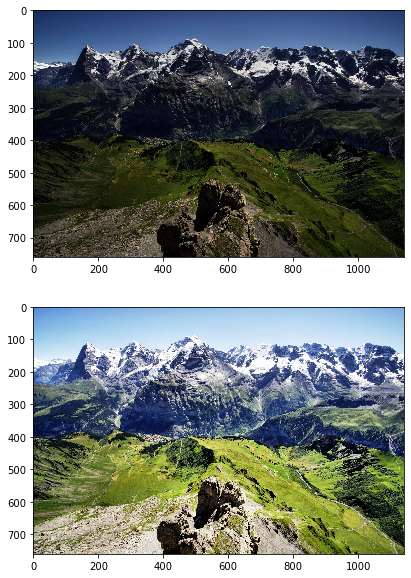

In [ ]:
print("Lets compare it to the original and another approach")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax[0].imshow(img_color)
ax[1] = display_image(255*equalize_histogram(img_color/255))

__Question__ Do you think this result looks right ? What may be wrong in our approach ? What could be a solution to this ?

__Answer__
Histogram equalization betters  the quality of images without losing information.However, as it enhances the intensity of pixels, it can show some hidden noise after the processing. In this case, the brown of the land had an inrease in its noise of white dots, making the image less visually appealing.
To solve this, we could have denoised the image, so as to avoid this problem.
https://www.ijntr.org/download_data/IJNTR03090003.pdf